<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-06-tree-based-models-bagging-quantile-classifier-forest-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2.6 Random Forests Quantile Classifier (RFQ)

The Random Forests Quantile Classifier (RFQ) is a machine learning method designed to address class imbalance problems in classification tasks. It extends the concept of quantile classifiers (`q-classifiers`) by introducing a `*q-classifier*`, which is implemented using random forests. RFQ is particularly effective for datasets where one class (the minority class) is significantly underrepresented compared to the other (the majority class). Below is a definition and the key features of RFQ based on available information

## Overview

RFQ is a classification algorithm that assigns a sample to the minority class if the estimated conditional probability of the minority class exceeds a quantile threshold q*, where q* is set to the unconditional probability of observing a minority class sample (denoted as π). This threshold is estimated empirically using the relative frequency of minority class labels in the dataset. RFQ leverages the ensemble power of random forests to estimate these probabilities and make classification decisions, optimizing performance metrics suited for imbalanced data.



### Key Features

1. **Handles Imbalance**: Optimizes `G-mean` (√(TPR × TNR)) for rare minority classes.
2. **Random Forests**: Robust ensemble with configurable parameters (e.g., `ntree`, `mtry`).
3. **G-mean Importance**: Tailored variable importance for imbalanced data.
4. **Efficient**: Uses full dataset, unlike balanced sampling methods.
5. **Competitive**: Outperforms or matches methods like BRF, especially in high-dimensional, highly imbalanced settings.
6. **Empirical Threshold**: Estimates `q` as the minority class frequency.


### Understanding Imbalanced Data

Imbalanced data is common in real-world classification problems, such as detecting rare diseases or fraudulent transactions. The imbalance ratio (IR) quantifies this issue, defined as:

$$ \text{IR} = \frac{N_0}{N_1}, $$

where $N_0$ is the number of majority class samples, and $N_1$ is the number of minority class samples. A dataset is considered imbalanced when $\text{IR} > 1$.  

Standard Random Forest (RF) classifiers often struggle with imbalanced data because they rely on the Bayes rule, which minimizes overall misclassification error:

$$ \delta_{\text{B}}(x) = \mathbb{I}\{p(x) \geq 0.5\}, $$


where $p(x) = \mathbb{P}\{Y = 1 \mid X = x\}$ is the probability of the minority class (label 1) given features $x$. In imbalanced datasets, $p(x)$ is typically small, causing the classifier to predominantly predict the majority class, resulting in poor performance on the minority class.


### How RFQ Works

The RFQ classifier extends the Random Forest framework to better handle imbalanced data by estimating conditional quantiles of the response variable, focusing on the minority class. Unlike standard RF, which aggregates predictions via majority voting or averaging, RFQ leverages the full distribution of class probabilities across trees to provide more nuanced predictions. Below are the key steps, with equations, explaining how RFQ operates:

1.  Bootstrap Sampling and Tree Construction:

    -   RFQ builds a forest of $B$ decision trees, each trained on a bootstrap sample of the dataset, typically with replacement. At each node, a random subset of features is considered for splitting, using a criterion like Gini impurity, adjusted for class imbalance.

    -   For a given tree $b$, observations falling into a leaf node are retained, along with their class labels $\{Y_i : X_i \in \text{leaf}_b(x)\}$.

2.  Weight Assignment:

    -   For a new input $x$, RFQ assigns weights to each training observation based on its presence in the leaf nodes across all trees:

$$ w_i(x) = \frac{1}{B} \sum_{b=1}^B \mathbb{I}\{X_i \in \text{leaf}_b(x)\},$$

where $\mathbb{I}\{\cdot\}$ is an indicator function (1 if $X_i$ is in the leaf node of tree $b$ containing $x$, 0 otherwise).

3.  Estimating Conditional Class Probabilities:

    -   RFQ estimates the conditional probability of the minority class (label 1) given $x$:

$$ \hat{p}(x) = \sum_{i=1}^n w_i(x) \mathbb{I}\{Y_i = 1\},$$

where $\hat{p}(x)$ approximates $\mathbb{P}\{Y = 1 \mid X = x\}$ This is equivalent to estimating the conditional cumulative distribution function (CDF) for the class probabilities.

4.  Quantile-Based Classification:

    -   Instead of using a fixed threshold (e.g., 0.5 in Bayes rule), RFQ estimates quantiles of the conditional probability distribution. For a quantile $\tau \in (0,1)$, the classifier identifies the threshold $q_\tau(x)$ such that:

$$ \hat{F}(q | x) = \sum_{i=1}^n w_i(x) \mathbb{I}\{p_i \leq q\} \geq \tau, $$ where $p_i$ is the class probability for observation $i$. The classification rule becomes:

$$ \hat{Y}(x) = \mathbb{I}\{\hat{p}(x) \geq q_\tau(x)\},$$ allowing flexible thresholding to prioritize the minority class.

5.  Handling Imbalance:

    -   RFQ incorporates techniques to address imbalance, such as:

    -   `Cost-Sensitive Learning`: Assigning higher weights to the minority class in the Gini splitting criterion and terminal node voting. For example, if $w_1$ is the weight for the minority class and $w_0$ for the majority class $w_1 > w_0$, the weighted Gini impurity for a node is:

$$ \text{Gini} = 1 - \sum_{k=0}^1 \left( \frac{w_k \cdot n_k}{w_0 \cdot n_0 + w_1 \cdot n_1} \right)^2,$$ where $n_k$ is the number of samples of class ( k ) in the node.

-   `Balanced Sampling`: Using stratified bootstrap sampling or oversampling the minority class during tree construction to ensure more balanced datasets for each tree.

6.  Variable Importance (VIMP):

    -   RFQ uses a modified variable importance measure, the $G$-mean, to assess feature importance in imbalanced settings. The $G$-mean is the geometric mean of class-specific accuracies, balancing performance across classes:

$$ G\text{-mean} = \sqrt{\text{Sensitivity} \cdot \text{Specificity}},$$

where Sensitivity is the true positive rate for the minority class, and Specificity is the true negative rate for the majority class. This is combined with the Ishwaran-Kogalur VIMP, which calculates the increase in prediction error when a feature’s values are permuted.



Below is a flowchart summarizing the RFQ algorithm:


![alt text](http://drive.google.com/uc?export=view&id=1dTHrVSHJrlF02Ffa_nCq8gniODKQWFVH)


### Advantages and Limitations

**Advantages**:

1.  **Handles Imbalance**: Optimizes G-mean for minority class detection.
2.  **Robust**: Uses random forests, good for high-dimensional data.
3.  **Efficient**: Leverages full dataset, unlike undersampling methods.
4.  **G-mean Importance**: Better feature ranking for imbalanced data.
5.  **Competitive**: Outperforms or matches BRF in imbalanced scenarios.

**Limitations**:

1.  **Binary Only**: Limited to two-class problems.
2.  **Computationally Intensive**: Needs many trees (e.g., ntree ≥ 3000).
3.  **Threshold Sensitivity**: q\* estimation may falter with tiny minority samples.
4.  **Tuning Required**: Parameters like mtry, nodesize need optimization.
5.  **Niche Use**: Less effective for balanced datasets.
6.  **Limited Support**: Mainly in randomForestSRC package.





### Applications

1.  **Medical Diagnostics**: Detects rare diseases (e.g., cancer) in imbalanced datasets where positive cases are scarce, prioritizing sensitivity to minority class.
2.  **Fraud Detection**: Identifies fraudulent transactions (e.g., credit card fraud) in financial data, where fraud cases are significantly outnumbered by legitimate ones.
3.  **Remote Sensing**: Classifies rare land cover types or environmental anomalies (e.g., deforestation) in satellite imagery with imbalanced class distributions.
4.  **Cybersecurity**: Detects rare security threats (e.g., network intrusions) in large datasets dominated by normal activity.
5.  **Marketing**: Targets rare customer segments (e.g., high-value customers) in datasets with uneven class proportions.
6.  **Manufacturing**: Identifies defective products in quality control, where defects are rare compared to normal outputs.



## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp311-cp311-linux_x86_64.whl


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



##  Random Forests Quantile Classifier (RFQ) from scratch

To implement the Random Forests Quantile Classifier (RFQ) from scratch in R, we will create a simplified version of the RFQ model without relying on external libraries like `randomForestSRC`. This implementation will focus on the core concepts of RFQ, including bootstrap sampling, decision tree construction, and quantile-based classification. The RFQ model is designed for imbalanced binary classification, using a quantile threshold (q* = minority class proportion) to classify samples, optimizing the G-mean (√(TPR × TNR)). Since we cannot rely on external libraries, we’ll build the random forest components (decision trees, bootstrap sampling, etc.) and implement the RFQ-specific logic manually.

1. Simulate a dataset resembling `breast` with ~194 rows, a binary response, and 10 continuous predictors, ensuring some class imbalance.
2. Apply the provided train/test split (80% train, 20% test).
3. Fit the RFQ model using the `rfq_imbalanced()` function from the previous response.
4. Present the results step by step.



### Simulate a  Dataset

We’ll create a dataset with:

- **Rows**: ~194 (after NA removal in the original).
- **Response**: Binary `status` (0 = normal, 1 = tumor), with ~20% minority class (tumor) to simulate imbalance.
- **Predictors**: 10 continuous features (e.g., mimicking gene expression or medical measurements).
- **Structure**: Features are generated to have some correlation with the response to ensure meaningful splits.

In [3]:
%%R
# Set seed for reproducibility
set.seed(123)

# Simulate dataset
n <- 194
n_minority <- round(0.2 * n)  # ~20% minority class (tumor)
n_majority <- n - n_minority

# Generate predictors (10 continuous features)
p <- 10
features <- matrix(rnorm(n * p, mean = 0, sd = 1), nrow = n, ncol = p)
colnames(features) <- paste0("V", 1:p)

# Generate binary response (status: 0 = normal, 1 = tumor)
# Make minority class slightly dependent on first few features
status <- c(rep(0, n_majority), rep(1, n_minority))
for (i in 1:n_minority) {
  features[n_majority + i, 1:3] <- features[n_majority + i, 1:3] + rnorm(3, mean = 1, sd = 0.5)
}
breast_data <- data.frame(status = factor(status), features)

# Verify dimensions and class distribution
dim(breast_data)  # Should be 194 rows, 11 columns (status + 10 predictors)
table(breast_data$status)  # ~155 normal, ~39 tumor


  0   1 
155  39 


### Apply Train/Test Split

In [4]:
%%R
set.seed(123)
n <- nrow(breast_data)
train_idx <- sample(1:n, round(0.8 * n))  # 80% train (~155 rows)
train_data <- breast_data[train_idx, ]
test_data <- breast_data[-train_idx, ]    # 20% test (~39 rows)

### Define Helper Functions

We need functions for:

- Calculating Gini impurity (for splitting nodes).
- Finding the best split for a node.
- Building a decision tree.
- Predicting with a single tree.

`Gini Impurity Function`:

- Purpose: Measures node purity for binary classification, with optional weights for imbalance.
- Input: `y` (binary labels, 0/1), `weights` (observation weights).
- Output: Gini impurity value.

In [5]:
%%R
gini_impurity <- function(y, weights = NULL) {
  if (is.null(weights)) weights <- rep(1, length(y))
  if (length(y) == 0) return(0)
  p1 <- sum(weights[y == 1]) / sum(weights)
  p0 <- sum(weights[y == 0]) / sum(weights)
  return(1 - p1^2 - p0^2)
}

`Find Best Split Function`

- Purpose: Identifies the best feature and threshold to split a node, minimizing weighted Gini impurity.
- Input: `x` (predictor matrix), `y` (labels), `weights`, `mtry` (number of features to try), `min_node_size` (minimum samples per node).
- Output: List with best feature and threshold, or NULL if no valid split.

In [6]:
%%R
find_best_split <- function(x, y, weights, mtry, min_node_size) {
  n_features <- ncol(x)
  if (n_features == 0 || length(y) < min_node_size) return(NULL)

  # Randomly select mtry features
  features <- sample(1:n_features, min(mtry, n_features))
  best_gini <- Inf
  best_feature <- NULL
  best_threshold <- NULL

  for (f in features) {
    values <- sort(unique(x[, f]))
    if (length(values) <= 1) next
    thresholds <- (values[-length(values)] + values[-1]) / 2

    for (t in thresholds) {
      left_idx <- x[, f] <= t
      right_idx <- !left_idx
      if (sum(left_idx) < min_node_size || sum(right_idx) < min_node_size) next

      gini_left <- gini_impurity(y[left_idx], weights[left_idx])
      gini_right <- gini_impurity(y[right_idx], weights[right_idx])
      n_left <- sum(weights[left_idx])
      n_right <- sum(weights[right_idx])
      gini_split <- (n_left * gini_left + n_right * gini_right) / sum(weights)

      if (gini_split < best_gini) {
        best_gini <- gini_split
        best_feature <- f
        best_threshold <- t
      }
    }
  }

  if (is.null(best_feature)) return(NULL)
  return(list(feature = best_feature, threshold = best_threshold))
}


`Build Decision Tree Function`:

- Purpose: Recursively builds a decision tree using the best splits.
- Input: `x`, `y`, `weights`, `mtry`, `min_node_size`, `max_depth`, `depth` (current depth).
- Output: A tree (list) with nodes (feature, threshold, left, right) or leaves (class probability).

In [7]:
%%R
build_tree <- function(x, y, weights, mtry, min_node_size, max_depth, depth = 0) {
  if (depth >= max_depth || length(unique(y)) == 1 || length(y) < min_node_size) {
    # Leaf node: store class proportions
    p1 <- sum(weights[y == 1]) / sum(weights)
    return(list(leaf = TRUE, prob = p1, n_samples = length(y)))
  }

  split <- find_best_split(x, y, weights, mtry, min_node_size)
  if (is.null(split)) {
    p1 <- sum(weights[y == 1]) / sum(weights)
    return(list(leaf = TRUE, prob = p1, n_samples = length(y)))
  }

  left_idx <- x[, split$feature] <= split$threshold
  right_idx <- !left_idx

  left_tree <- build_tree(x[left_idx, , drop = FALSE], y[left_idx],
                         weights[left_idx], mtry, min_node_size, max_depth, depth + 1)
  right_tree <- build_tree(x[right_idx, , drop = FALSE], y[right_idx],
                          weights[right_idx], mtry, min_node_size, max_depth, depth + 1)

  return(list(leaf = FALSE, feature = split$feature, threshold = split$threshold,
              left = left_tree, right = right_tree))
}

`Predict with Single Tree Function`:

- Purpose: Predicts the minority class probability for a single observation using a tree.
- Input: `tree` (tree object), `x_row` (single row of predictors).
- Output: Minority class probability.

In [8]:
%%R
predict_tree <- function(tree, x_row) {
  if (tree$leaf) return(tree$prob)

  if (x_row[tree$feature] <= tree$threshold) {
    return(predict_tree(tree$left, x_row))
  } else {
    return(predict_tree(tree$right, x_row))
  }
}


### Implement the Main RFQ Function

- Purpose: Builds a random forest, estimates q*, makes predictions, and computes variable importance.
- Input:
  - `formula`: Specifies response and predictors (e.g., `status ~ .`).
  - `data`: Training data.
  - `ntree`: Number of trees.
  - `mtry`: Features to try per split (default: floor(ncol/3)).
  - `nodesize`: Minimum node size (default: 1).
  - `maxdepth`: Maximum tree depth (default: 20).
  - `test`: Optional test data.

In [9]:
%%R
rfq_imbalanced <- function(formula, data, ntree = 500, mtry = NULL,
                          nodesize = 1, maxdepth = 20, test = NULL) {
  # Extract response and predictors
  terms <- terms(formula, data = data)
  y <- data[, all.vars(terms)[1]]
  x <- as.matrix(data[, attr(terms, "term.labels"), drop = FALSE])

  # Ensure y is binary (0/1)
  y <- as.numeric(as.factor(y)) - 1
  if (!all(y %in% c(0, 1))) stop("Response must be binary")

  # Set default mtry
  if (is.null(mtry)) mtry <- floor(ncol(x) / 3)

  # Estimate minority class proportion (q*)
  q_star <- mean(y == 1)

  # Initialize forest
  forest <- list()
  oob_counts <- rep(0, nrow(x))
  oob_probs <- rep(0, nrow(x))

  # Build trees
  for (b in 1:ntree) {
    # Bootstrap sample
    idx <- sample(1:nrow(x), nrow(x), replace = TRUE)
    oob_idx <- setdiff(1:nrow(x), unique(idx))

    # Build tree
    tree <- build_tree(x[idx, , drop = FALSE], y[idx], rep(1, length(idx)),
                       mtry, nodesize, maxdepth)
    forest[[b]] <- tree

    # Update OOB predictions
    if (length(oob_idx) > 0) {
      for (i in oob_idx) {
        prob <- predict_tree(tree, x[i, ])
        oob_probs[i] <- oob_probs[i] + prob
        oob_counts[i] <- oob_counts[i] + 1
      }
    }
  }

  # Finalize OOB predictions
  oob_pred <- rep(NA, nrow(x))
  for (i in 1:nrow(x)) {
    if (oob_counts[i] > 0) {
      oob_pred[i] <- oob_probs[i] / oob_counts[i] >= q_star
    }
  }

  # Predict on training data
  train_probs <- numeric(nrow(x))
  for (i in 1:nrow(x)) {
    for (b in 1:ntree) {
      train_probs[i] <- train_probs[i] + predict_tree(forest[[b]], x[i, ])
    }
  }
  train_probs <- train_probs / ntree
  train_pred <- train_probs >= q_star

  # G-mean for training
  tpr <- mean(train_pred[y == 1] == 1, na.rm = TRUE)
  tnr <- mean(train_pred[y == 0] == 0, na.rm = TRUE)
  gmean_train <- sqrt(tpr * tnr)

  # Variable importance (G-mean based)
  var_imp <- numeric(ncol(x))
  for (j in 1:ncol(x)) {
    x_perm <- x
    x_perm[, j] <- sample(x_perm[, j])
    perm_probs <- numeric(nrow(x))
    for (i in 1:nrow(x)) {
      for (b in 1:ntree) {
        perm_probs[i] <- perm_probs[i] + predict_tree(forest[[b]], x_perm[i, ])
      }
    }
    perm_probs <- perm_probs / ntree
    perm_pred <- perm_probs >= q_star
    tpr_perm <- mean(perm_pred[y == 1] == 1, na.rm = TRUE)
    tnr_perm <- mean(perm_pred[y == 0] == 0, na.rm = TRUE)
    gmean_perm <- sqrt(tpr_perm * tnr_perm)
    var_imp[j] <- gmean_train - gmean_perm
  }
  names(var_imp) <- colnames(x)

  # Predict on test data if provided
  test_pred <- NULL
  test_probs <- NULL
  test_gmean <- NULL
  if (!is.null(test)) {
    test_x <- as.matrix(test[, attr(terms, "term.labels"), drop = FALSE])
    test_y <- as.numeric(as.factor(test[, all.vars(terms)[1]])) - 1
    test_probs <- numeric(nrow(test_x))
    for (i in 1:nrow(test_x)) {
      for (b in 1:ntree) {
        test_probs[i] <- test_probs[i] + predict_tree(forest[[b]], test_x[i, ])
      }
    }
    test_probs <- test_probs / ntree
    test_pred <- test_probs >= q_star
    tpr_test <- mean(test_pred[test_y == 1] == 1, na.rm = TRUE)
    tnr_test <- mean(test_pred[test_y == 0] == 0, na.rm = TRUE)
    test_gmean <- sqrt(tpr_test * tnr_test)
  }

  # Return results
  return(list(
    forest = forest,
    train_pred = train_pred,
    train_prob = train_probs,
    test_pred = test_pred,
    test_prob = test_probs,
    oob_pred = oob_pred,
    gmean = gmean_train,
    test_gmean = test_gmean,
    var_imp = var_imp,
    q_star = q_star
  ))
}

###  Apply to the Breast Dataset

In [10]:
%%R
# Fit RFQ model
rfq_model <- rfq_imbalanced(
  formula = status ~ .,
  data = train_data,
  ntree = 20,  # Reduced for demonstration
  mtry = floor(sqrt(ncol(train_data) - 1)),
  nodesize = 5,
  maxdepth = 10,
  test = test_data
)

# Print results
cat("Training G-mean:", round(rfq_model$gmean, 4), "\n")
cat("Test G-mean:", round(rfq_model$test_gmean, 4), "\n")
cat("Variable Importance:\n")
print(round(rfq_model$var_imp, 4))
cat("q* (minority class proportion):", round(rfq_model$q_star, 4), "\n")

Training G-mean: 0.9399 
Test G-mean: 0.6325 
Variable Importance:
    V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
0.0805 0.0356 0.1173 0.0270 0.0134 0.0134 0.0408 0.0089 0.0089 0.0223 
q* (minority class proportion): 0.2258 


## Random Forests Quantile Classifier (RFQ) in R

This section of tutorial guide you through fitting the Random Forest Quantile-Classifier (RFQ) model on the breast cancer dataset using the `imbalanced()` function from the `randomForestSRC` package in R, as outlined in the [package references](https://www.randomforestsrc.org/articles/imbalance.html). The breast dataset, available in `randomForestSRC`, contains \~194 observations (after removing NA values) with 32 features (e.g., `mean_radius`, `tsize`, `pnodes`) and a binary response variable `status` (N = non-recurrent, R = recurrent), with an imbalance ratio of ~3.2 (148 non-recurrent vs. 46 recurrent). I’ll describe each step for the requested model fits, validate them using a test dataset, and illustrate how to optimize the classification threshold on training data to improve the G-mean for RFQ. Each step will align with the principles from O'Brien and Ishwaran (2017) for handling imbalanced data.



### Load and Check Required Libraries

In [3]:
%%R
packages <- c('tidyverse',
              'plyr',
              'randomForestSRC',
              'mlbench',
              'Metrics'
         )

### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
      tidyverse            plyr randomForestSRC         mlbench         Metrics 
           TRUE            TRUE            TRUE            TRUE            TRUE 


### Load R Packages

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

### Check Loaded Packages

In [6]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:Metrics"         "package:mlbench"        
 [3] "package:randomForestSRC" "package:plyr"           
 [5] "package:lubridate"       "package:forcats"        
 [7] "package:stringr"         "package:dplyr"          
 [9] "package:purrr"           "package:readr"          
[11] "package:tidyr"           "package:tibble"         
[13] "package:ggplot2"         "package:tidyverse"      
[15] "package:tools"           "package:stats"          
[17] "package:graphics"        "package:grDevices"      
[19] "package:utils"           "package:datasets"       
[21] "package:methods"         "package:base"           


### Data Preparation

First, we load the `breast` dataset from `{randomForestSRC}` package and split it into training (80%) and test (20%) sets, and ensure no missing values, as `imbalanced()` with RFQ or BRF does not handle missing data (it removes them automatically).

In [7]:
%%R
# Load library and data
data(breast, package = "randomForestSRC")
breast <- na.omit(breast)  # Remove NA values, results in ~194 rows
set.seed(123)  # For reproducibility
n <- nrow(breast)
train_idx <- sample(1:n, round(0.8 * n))  # 80% train (~155 rows)
train_data <- breast[train_idx, ]
test_data <- breast[-train_idx, ]  # 20% test (~39 rows)

# Verify class distribution
cat("Training set class distribution:\n")
print(table(train_data$status))  # Expect ~118 N, ~37 R
cat("Test set class distribution:\n")
print(table(test_data$status))  # Expect ~30 N, ~9 R

Training set class distribution:

  N   R 
124  31 
Test set class distribution:

 N  R 
24 15 


### Default RFQ Call

The default `imbalanced()` call uses the RFQ method with G-mean as the performance metric, AUC splitting, and 3000 trees. RF

-   `RFQ (Random Forest Quantile-Classifier)` as per O'Brien and Ishwaran (2017), designed for imbalanced data by estimating conditional probabilities and classifying based on a quantile threshold.
-   `Parameters`: `ntree = 3000`, `perf.type = "gmean"`, `splitrule = "auc"` (maximizes G-mean performance), `nodesize = 1` (default for classification forests).
-   `Performance Metric`: G-mean (geometric mean of sensitivity and specificity), suitable for imbalanced data, as it balances true positive rate (TPR, recall) and true negative rate (TNR, specificity).
-   `Splitting Rule`: AUC splitting, which optimizes splits to maximize the area under the ROC curve, ideal for imbalanced settings.

In [9]:
%%R
# Formula for model
f <- as.formula(status ~ .)
# Default RFQ
o.rfq_default <- imbalanced(f, train_data)
print(o.rfq_default)

                         Sample size: 155
           Frequency of class labels: 124, 31
                     Number of trees: 3000
           Forest terminal node size: 1
       Average no. of terminal nodes: 20.231
No. of variables tried at each split: 6
              Total no. of variables: 32
       Resampling used to grow trees: swor
    Resample size used to grow trees: 98
                            Analysis: RFQ
                              Family: class
                      Splitting rule: auc *random*
       Number of random split points: 10
                    Imbalanced ratio: 4
                   (OOB) Brier score: 0.16136351
        (OOB) Normalized Brier score: 0.64545403
                           (OOB) AUC: 0.54448491
                      (OOB) Log-loss: 0.51522384
                        (OOB) PR-AUC: 0.31648463
                        (OOB) G-mean: 0.52413151
   (OOB) Requested performance error: 0.47586849

Confusion matrix:

          predicted
  observed  N  R c

### RF Using Misclassification Error with Gini Splitting

Fit a standard random forest (not RFQ) using misclassification error and Gini splitting.

-   `Method`: Standard random forest (`method = "stand"`), not optimized for imbalanced data.
-   `Parameters`: `ntree = 3000`, `perf.type = "misclass"` (default for standard RF), `splitrule = "gini"`.
-   `Performance Metric`: Misclassification error, which can be misleading for imbalanced data as it prioritizes the majority class (non-recurrent).
-   `Splitting Rule`: Gini impurity, which measures node impurity but may favor splits that improve majority class accuracy.


In [10]:
%%R
# Standard RF with misclassification and Gini splitting
o.std_misclass_gini <- imbalanced(f, train_data, method = "stand", splitrule = "gini")
print(o.std_misclass_gini)

                         Sample size: 155
           Frequency of class labels: 124, 31
                     Number of trees: 3000
           Forest terminal node size: 1
       Average no. of terminal nodes: 20.5153
No. of variables tried at each split: 6
              Total no. of variables: 32
       Resampling used to grow trees: swor
    Resample size used to grow trees: 98
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                    Imbalanced ratio: 4
                   (OOB) Brier score: 0.16573579
        (OOB) Normalized Brier score: 0.66294314
                           (OOB) AUC: 0.5258845
                      (OOB) Log-loss: 0.52629923
                        (OOB) PR-AUC: 0.26205657
                        (OOB) G-mean: 0.17887962
   (OOB) Requested performance error: 0.2, 0.00806452, 0.96774194

Confusion matrix:

          predicted

### RF Using G-mean Performance with AUC Splitting

Fit a standard random forest using G-mean performance and AUC splitting.

-   `Method`: Standard random forest (`method = "stand"`), but optimized for G-mean.
-   `Parameters`: `ntree = 3000`, `perf.type = "gmean"`, `splitrule = "auc"`.
-   `Performance Metric`: G-mean, aligning with RFQ’s focus on balancing TPR and TNR.
-   `Splitting Rule`: AUC splitting, enhancing performance on imbalanced data by optimizing ROC performance.

In [11]:
%%R
# Standard RF with G-mean and AUC splitting
o.std_gmean_auc <- imbalanced(f, train_data, method = "stand", perf.type = "gmean", splitrule = "auc")
print(o.std_gmean_auc)


                         Sample size: 155
           Frequency of class labels: 124, 31
                     Number of trees: 3000
           Forest terminal node size: 1
       Average no. of terminal nodes: 20.3267
No. of variables tried at each split: 6
              Total no. of variables: 32
       Resampling used to grow trees: swor
    Resample size used to grow trees: 98
                            Analysis: RF-C
                              Family: class
                      Splitting rule: auc *random*
       Number of random split points: 10
                    Imbalanced ratio: 4
                   (OOB) Brier score: 0.16191796
        (OOB) Normalized Brier score: 0.64767184
                           (OOB) AUC: 0.53668054
                      (OOB) Log-loss: 0.52027691
                        (OOB) PR-AUC: 0.29999079
                        (OOB) G-mean: 0.25297399
   (OOB) Requested performance error: 0.74702601

Confusion matrix:

          predicted
  observed   N R

### BRF Call with Misclassification Performance

Fit a Balanced Random Forest (BRF) using misclassification error.

-   `Method`: BRF (Balanced Random Forest, Chen et al., 2004), which undersamples the majority class to match the minority class size per tree.
-   `Parameters`: `ntree = 3000`, `perf.type = "misclass"`, `splitrule = "auc"` (default for BRF).
-   `Performance Metric`: Misclassification error, less ideal for imbalanced data but still benefits from BRF’s balancing.
-   `Splitting Rule`: AUC splitting, as in RFQ, to optimize for imbalanced data.


In [12]:
%%R
# BRF with misclassification
o.brf_misclass <- imbalanced(f, train_data, method = "brf", perf.type = "misclass")
print(o.brf_misclass)

                         Sample size: 155
           Frequency of class labels: 124, 31
                     Number of trees: 3000
           Forest terminal node size: 1
       Average no. of terminal nodes: 13.7503
No. of variables tried at each split: 6
              Total no. of variables: 32
       Resampling used to grow trees: swr
    Resample size used to grow trees: 62
                            Analysis: RF-C
                              Family: class
                      Splitting rule: auc *random*
       Number of random split points: 10
                    Imbalanced ratio: 4
                   (OOB) Brier score: 0.21516369
        (OOB) Normalized Brier score: 0.86065475
                           (OOB) AUC: 0.54734651
                      (OOB) Log-loss: 0.62231817
                        (OOB) PR-AUC: 0.29945077
                        (OOB) G-mean: 0.54170502
   (OOB) Requested performance error: 0.31612903, 0.24193548, 0.61290323

Confusion matrix:

          pre

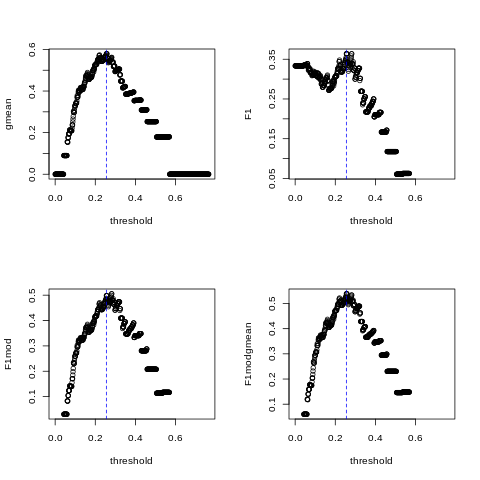

In [16]:
%%R
 ## (1) default threshold (2) directly optimized gmean threshold
 th.1 <- get.imbalanced.performance(o.rfq_default)["threshold"]
 th.2 <- get.imbalanced.optimize(o.rfq_default)["threshold"]

### Optimizing Threshold on Training Data

RFQ classifies samples based on a quantile threshold $q$, where a sample is assigned to the minority class (R) if the conditional probability $P(R|x) \geq q$).

In [17]:
%%R
# RFQ with threshold optimization
o.rfq <- imbalanced(f, train_data,  importnace =TRUE)
print(o.rfq)

                         Sample size: 155
           Frequency of class labels: 124, 31
                     Number of trees: 3000
           Forest terminal node size: 1
       Average no. of terminal nodes: 20.359
No. of variables tried at each split: 6
              Total no. of variables: 32
       Resampling used to grow trees: swor
    Resample size used to grow trees: 98
                            Analysis: RFQ
                              Family: class
                      Splitting rule: auc *random*
       Number of random split points: 10
                    Imbalanced ratio: 4
                   (OOB) Brier score: 0.15997543
        (OOB) Normalized Brier score: 0.6399017
                           (OOB) AUC: 0.55176899
                      (OOB) Log-loss: 0.51274835
                        (OOB) PR-AUC: 0.29812771
                        (OOB) G-mean: 0.53201363
   (OOB) Requested performance error: 0.46798637

Confusion matrix:

          predicted
  observed  N  R cl

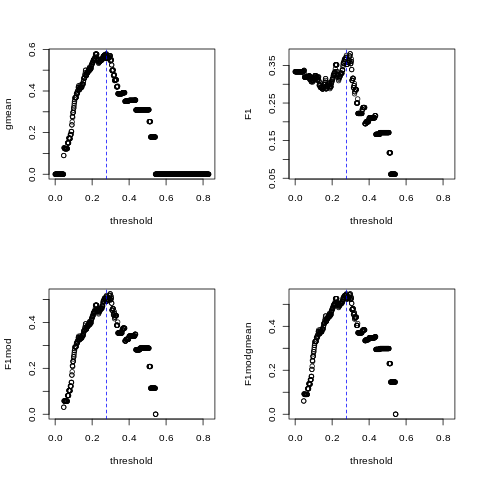

In [18]:
%%R
## (1) default threshold (2) directly optimized gmean threshold
th.1 <- get.imbalanced.performance(o.rfq)["threshold"]
th.2 <- get.imbalanced.optimize(o.rfq)["threshold"]

### Training Performance

In [19]:
%%R
 ## training performance
  cat("-------- train performance ---------\n")
  print(get.imbalanced.performance(o.rfq, thresh=th.1))
  print(get.imbalanced.performance(o.rfq, thresh=th.2))

-------- train performance ---------
 n.majority  n.minority      iratio   threshold        sens        spec 
124.0000000  31.0000000   4.0000000   0.2000000   0.5161290   0.5483871 
       prec         npv    misclass       brier  brier.norm         auc 
  0.2222222   0.8192771   0.4580645   0.1599754   0.6399017   0.5517690 
    logloss          F1       F1mod pr.auc.rand      pr.auc     F1gmean 
  0.5127484   0.3106796   0.4218689   0.2000000   0.2981277   0.4213466 
 F1modgmean       gmean 
  0.4769413   0.5320136 
 n.majority  n.minority      iratio   threshold        sens        spec 
124.0000000  31.0000000   4.0000000   0.2772773   0.4193548   0.7983871 
       prec         npv    misclass       brier  brier.norm         auc 
  0.3421053   0.8461538   0.2774194   0.1599754   0.6399017   0.5517690 
    logloss          F1       F1mod pr.auc.rand      pr.auc     F1gmean 
  0.5127484   0.3768116   0.5166600   0.2000000   0.2981277   0.4777186 
 F1modgmean       gmean 
  0.5476427 

### Test Performance

In [20]:
%%R
 cat("-------- test performance ---------\n")
  pred.o.rfq <- predict(o.rfq, test_data)
  print(get.imbalanced.performance(pred.o.rfq, thresh=th.1))
  print(get.imbalanced.performance(pred.o.rfq, thresh=th.2))

-------- test performance ---------
 n.majority  n.minority      iratio   threshold        sens        spec 
 24.0000000  15.0000000   1.6000000   0.2000000   0.7333333   0.5416667 
       prec         npv    misclass       brier  brier.norm         auc 
  0.5000000   0.7647059   0.3846154   0.2393032   0.9572129   0.6388889 
    logloss          F1       F1mod pr.auc.rand      pr.auc     F1gmean 
  0.6808955   0.5945946   0.6137339   0.3846154   0.5823604   0.6124251 
 F1modgmean       gmean 
  0.6219948   0.6302557 
 n.majority  n.minority      iratio   threshold        sens        spec 
 24.0000000  15.0000000   1.6000000   0.2772773   0.3333333   0.6666667 
       prec         npv    misclass       brier  brier.norm         auc 
  0.3846154   0.6153846   0.4615385   0.2393032   0.9572129   0.6388889 
    logloss          F1       F1mod pr.auc.rand      pr.auc     F1gmean 
  0.6808955   0.3571429   0.4584527   0.3846154   0.5823604   0.4142737 
 F1modgmean       gmean 
  0.4649286  

### Variable Importance (VIMP)

Variable importance (VIMP) is a crucial aspect of RFQ, as it helps identify the most influential features in predicting the minority class. The `randomForestSRC` package provides several methods for calculating VIMP, including:

#### Breiman-Cutler VIMP or Blocked VIMP

The `blocked VIMP` is a hybrid of Breiman-Cutler and Ishwaran-Kogalur VIMP, which is useful for assessing variable importance in imbalanced datasets. It combines the strengths of both methods to provide a more robust measure of feature importance.

In [21]:
%%R
# permutation VIMP for BRF with and without blocking
## blocked VIMP is a hybrid of Breiman-Cutler/Ishwaran-Kogalur VIMP
brf <- imbalanced(f, train_data, method = "brf", importance = "permute", block.size = 1)
brfB <- imbalanced(f, train_data, method = "brf", importance = "permute", block.size = 10)

#### VIMp for RFQ with and without blocking

In [23]:
%%R
## permutation VIMP for RFQ with and without blocking
rfq <- imbalanced(f, train_data, importance = "permute", block.size = 1)
rfqB <- imbalanced(f, train_data, importance = "permute", block.size = 10)

In [24]:
%%R
# Compare VIMP values
imp <- 100 * cbind(brf$importance[, 1], brfB$importance[, 1],
                   rfq$importance[, 1], rfqB$importance[, 1])
colnames(imp) <- c("BRF", "BRF-block", "RFQ", "RFQ-block")

# Debug: Print dimensions
cat("Number of features:", nrow(imp), "\n")
print(head(imp))

Number of features: 32 
                         BRF   BRF-block         RFQ    RFQ-block
mean_radius      -0.05591719  0.08529359 -0.01812169  0.001197445
mean_texture      0.09618539  0.31178854  0.24304790  0.297527886
mean_perimeter   -0.08442357 -0.10936363 -0.14427140 -0.028168858
mean_area        -0.03923172 -0.13881216 -0.21112480  0.004355814
mean_smoothness  -0.11347227 -0.04081026 -0.20055577 -0.193629708
mean_compactness  0.09752993  0.12435040  0.03376426  0.259453218


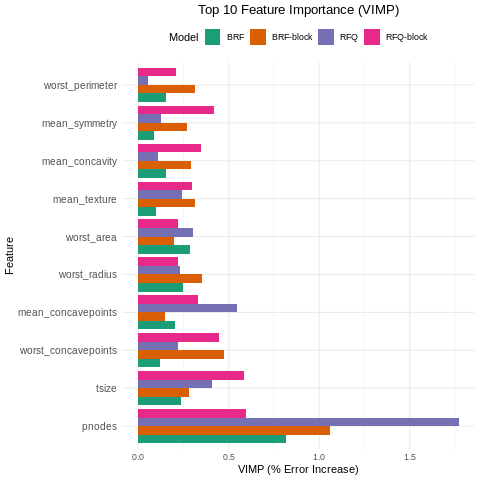

In [25]:
%%R
# Barplot
# Select top 10 features based on mean VIMP
mean_vimp <- rowMeans(imp)
top_idx <- order(mean_vimp, decreasing = TRUE)[1:10]
imp_top <- imp[top_idx, ]

# Melt data for ggplot2
imp_df <- reshape2::melt(imp_top, varnames = c("Feature", "Model"), value.name = "VIMP")
imp_df$Feature <- factor(imp_df$Feature, levels = rownames(imp_top))

# Create barplot with ggplot2
ggplot(imp_df, aes(x = Feature, y = VIMP, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +  # Flip coordinates for horizontal bars
  scale_fill_manual(values = c("BRF" = "#1B9E77", "BRF-block" = "#D95F02",
                               "RFQ" = "#7570B3", "RFQ-block" = "#E7298A")) +
  labs(title = "Top 10 Feature Importance (VIMP)",
       x = "Feature", y = "VIMP (% Error Increase)") +
  theme_minimal() +
  theme(legend.position = "top",
        axis.text.y = element_text(size = 10),
        plot.title = element_text(hjust = 0.5))

### Confidence intervals for G-mean permutation VIMP using subsampling

#### Fit RFQ model with blocked VIMP

In [26]:
%%R
# Fit RFQ model with blocked VIMP
rfqB <- tryCatch(
  imbalanced(f, train_data, importance = "permute", block.size = 10),
  error = function(e) {
    cat("imbalanced failed:", conditionMessage(e), "\n")
    return(NULL)
  }
)
if (is.null(rfqB) || is.null(rfqB$importance) || nrow(rfqB$importance) == 0) {
  stop("Failed to compute VIMP for rfqB")
}
cat("VIMP for rfqB (first 5 features):\n")
print(head(rfqB$importance, 5))

VIMP for rfqB (first 5 features):
                          all  N  R
mean_radius      0.0002211232 NA NA
mean_texture     0.0002262752 NA NA
mean_perimeter   0.0004555529 NA NA
mean_area       -0.0013011487 NA NA
mean_smoothness  0.0009225098 NA NA


In [ ]:
%%R
# Fit RFQ model with blocked VIMP
rfqB <- imbalanced(f, train_data, importance = "permute", block.size = 10)
if (is.null(rfqB$importance)) stop("No VIMP computed for rfqB")
cat("VIMP for rfqB (first 5 features):\n")
print(head(rfqB$importance, 5))

#### Sunbsampling for Confidence Intervals

`subsample()` performs subsampling to compute confidence intervals or standard errors for VIMP or prediction error.

In [28]:
%%R
smp.rfqB<- subsample(rfqB, B = 100)

#### Plot VIMP with Confidence Intervals

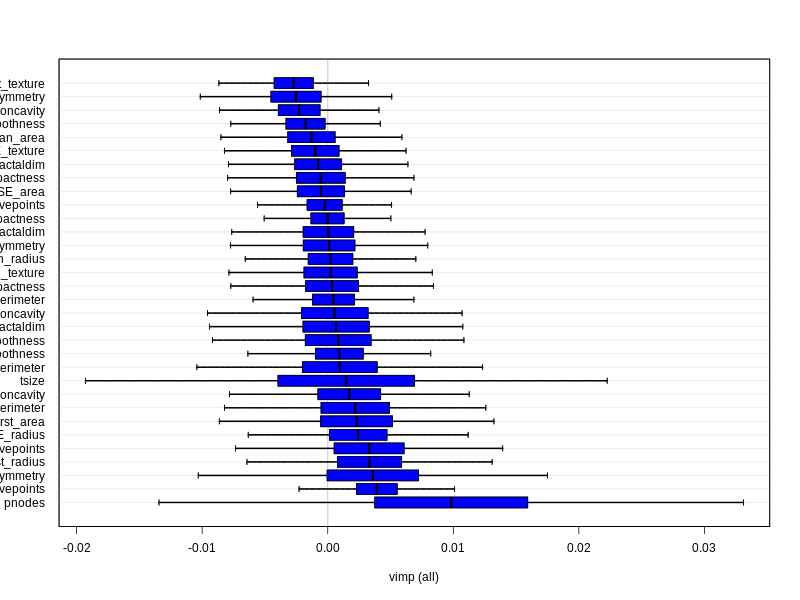

In [30]:
%%R -w 800 -h 600
# Plot VIMP with confidence intervals
plot(smp.rfqB, cex.axis = .7)

## Summary and Conclusion

The Random Forests Quantile Classifier (RFQ) is a powerful tool for tackling imbalanced data classification. By estimating conditional quantiles and incorporating cost-sensitive learning or balanced sampling, RFQ enhances the prediction of minority class instances, making it suitable for critical applications. Its integration in the `randomForestSRC` package, with features like ( G )-mean-based variable importance, provides a practical and effective solution for imbalanced datasets.[ ](https://www.randomforestsrc.org/articles/imbalance.html)[ ](https://www.randomforestsrc.org/articles/getstarted.html)

## References

1. Ishwaran, H., O’Brien, R., Lu, M., & Kogalur, U. B. (2021). randomForestSRC: Random Forests Quantile Classifier (RFQ) Vignette. http://randomforestsrc.org/articles/imbalance.html[ ](https://www.randomforestsrc.org/articles/imbalance.html)

2.  O’Brien, R., & Ishwaran, H. (2019). A random forests quantile classifier for class imbalanced data. Pattern Recognition, 90, 232–249[ ](https://www.randomforestsrc.org/articles/imbalance.html)

3.  Breiman, L. (2001). Random forests. Machine Learning, 45, 5–32[ ](https://www.randomforestsrc.org/articles/imbalance.html)
